In [246]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

from imblearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [218]:
df=pd.read_csv('weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [219]:
df.shape

(142193, 24)

In [220]:
cols=df.columns
cols

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

In [221]:
#### deal with the NANS
df.isna().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000206CE79E668>,
      dtype=object)

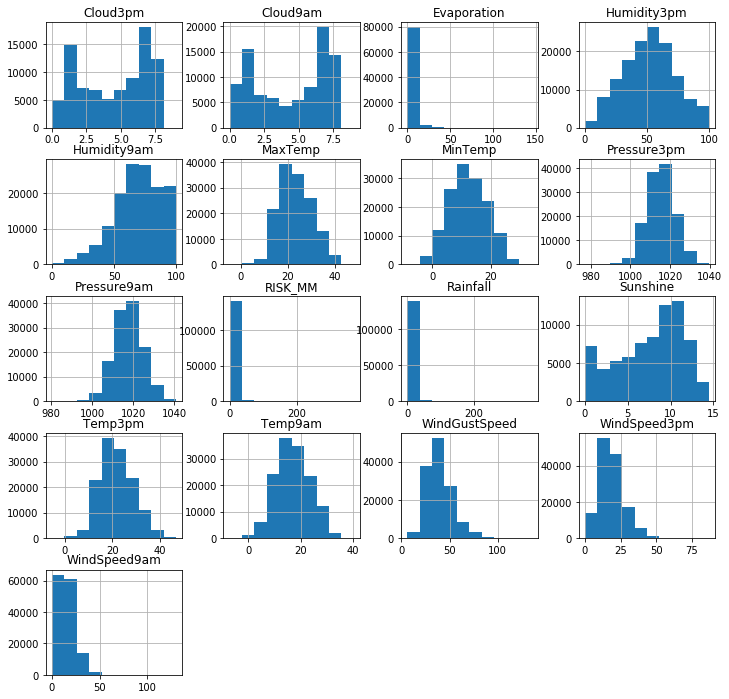

In [222]:
hist = df.hist(figsize=(12, 12))
hist

In [223]:
df=df[pd.notnull(df['RainToday'])]
df=df[pd.notnull(df['WindDir9am'])]
df=df[pd.notnull(df['WindDir3pm'])]
df=df[pd.notnull(df['WindGustDir'])]

le = preprocessing.LabelEncoder()
df['RainTomorrow']=le.fit_transform(df['RainTomorrow'])
df['Location']=le.fit_transform(df['Location'])
df['RainToday']=le.fit_transform(df['RainToday'])
df['WindDir3pm']=le.fit_transform(df['WindDir3pm'])
df['WindDir9am']=le.fit_transform(df['WindDir9am'])
df['WindGustDir']=le.fit_transform(df['WindGustDir'])

In [224]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,1,13.4,22.9,0.6,NaN,NaN,13,44.0,13,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0,0.0,0
1,2008-12-02,1,7.4,25.1,0.0,NaN,NaN,14,44.0,6,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0,0.0,0
2,2008-12-03,1,12.9,25.7,0.0,NaN,NaN,15,46.0,13,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0,0.0,0
3,2008-12-04,1,9.2,28.0,0.0,NaN,NaN,4,24.0,9,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0,1.0,0
4,2008-12-05,1,17.5,32.3,1.0,NaN,NaN,13,41.0,1,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0.2,0


In [225]:
df["RainTomorrow"].unique()

array([0, 1], dtype=int64)

In [226]:
def plotByClasses(df, colName, classCol):
    _, edges = np.histogram(df[colName], bins=10)
    histdata = []; labels=[]
    for n, group in df.groupby(classCol):
        histdata.append(np.histogram(group[colName], bins=edges)[0])
        labels.append(n)

    hist = np.array(histdata) 
    histcum = np.cumsum(hist,axis=0)

    plt.bar(edges[:-1],hist[0,:], width=np.diff(edges)[0],
                label=labels[0], align="edge")

    for i in range(1,len(hist)):
        plt.bar(edges[:-1],hist[i,:], width=np.diff(edges)[0],
                bottom=histcum[i-1,:],label=labels[i], align="edge")
    
    plt.xlabel(colName)
    plt.legend(title="BY CLASSES")
    plt.show()

In [227]:
del(df['Date'])

In [228]:
df['Location'].unique()

array([ 1,  3,  9, 10, 20, 24, 25, 28, 32, 35, 36, 40, 43, 45,  8, 38, 22,
        4,  5, 33, 18, 17, 19, 23, 31, 42, 11,  6,  7, 13, 37,  0, 21, 26,
       46, 44, 27, 30, 29, 34, 41, 14, 16,  2, 12, 15, 39], dtype=int64)

In [229]:
df['Evaporation'].fillna((df['Evaporation'].mean()), inplace=True)
df['Pressure9am'].fillna((df['Pressure9am'].mean()), inplace=True)
df['Pressure3pm'].fillna((df['Pressure3pm'].mean()), inplace=True)


mean_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
mean_imputer = mean_imputer.fit(df)
df_Fin = mean_imputer.transform(df.values)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000206D5E5A400>,
      dtype=object)

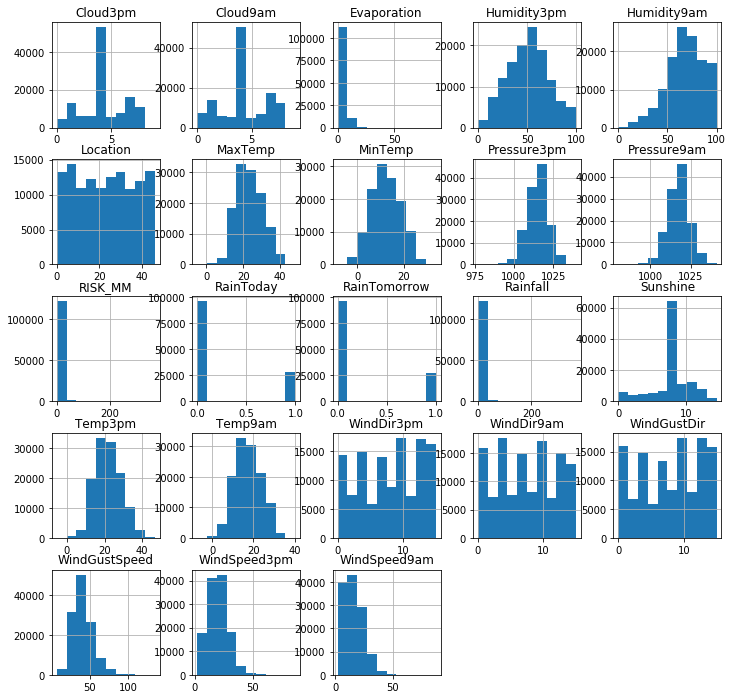

In [230]:
df = pd.DataFrame(df_Fin)
df.columns=['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow']
hist=df.hist(figsize=(12, 12))
hist

In [231]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,1.0,13.4,22.9,0.6,5.609501,7.718384,13.0,44.0,13.0,14.0,...,22.0,1007.7,1007.1,8.000000,4.491408,16.9,21.8,0.0,0.0,0.0
1,1.0,7.4,25.1,0.0,5.609501,7.718384,14.0,44.0,6.0,15.0,...,25.0,1010.6,1007.8,4.407404,4.491408,17.2,24.3,0.0,0.0,0.0
2,1.0,12.9,25.7,0.0,5.609501,7.718384,15.0,46.0,13.0,15.0,...,30.0,1007.6,1008.7,4.407404,2.000000,21.0,23.2,0.0,0.0,0.0
3,1.0,9.2,28.0,0.0,5.609501,7.718384,4.0,24.0,9.0,0.0,...,16.0,1017.6,1012.8,4.407404,4.491408,18.1,26.5,0.0,1.0,0.0
4,1.0,17.5,32.3,1.0,5.609501,7.718384,13.0,41.0,1.0,7.0,...,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0.0,0.2,0.0


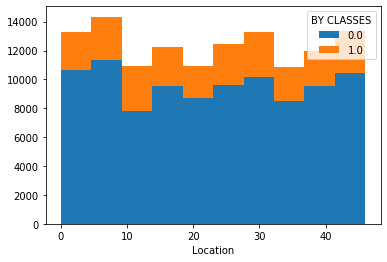

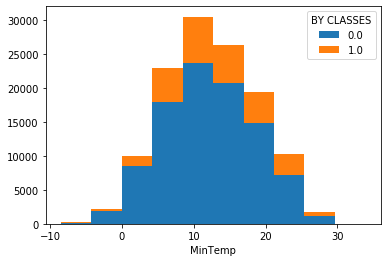

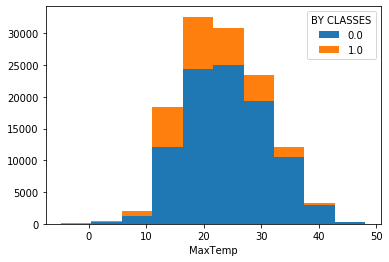

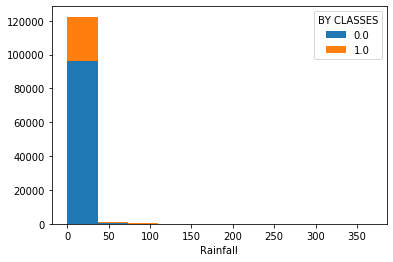

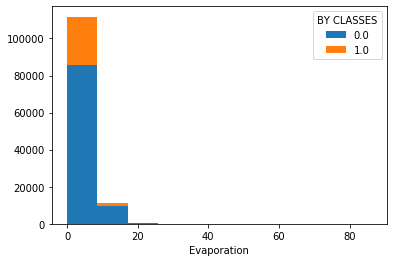

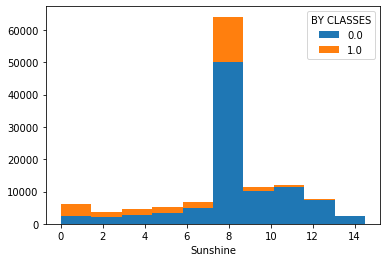

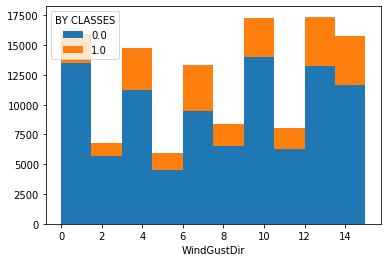

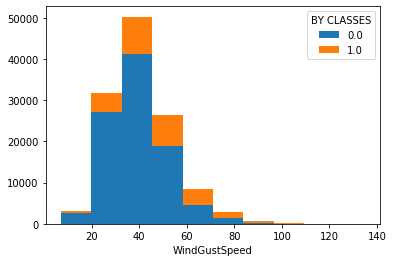

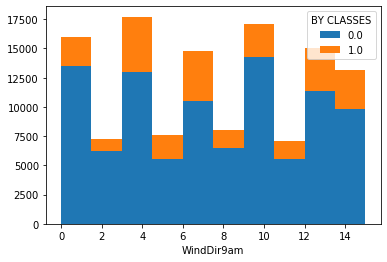

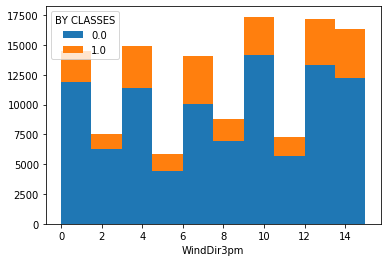

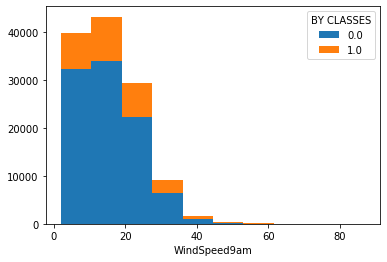

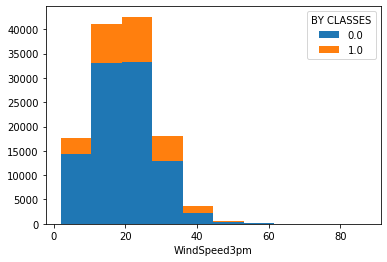

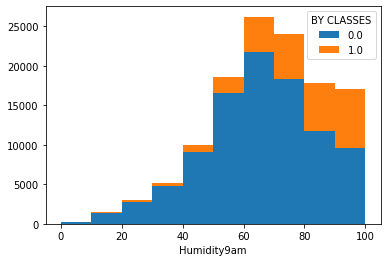

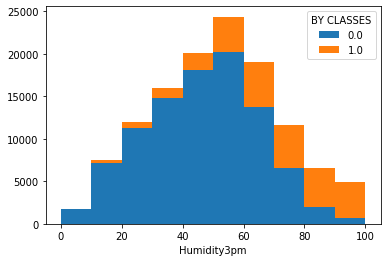

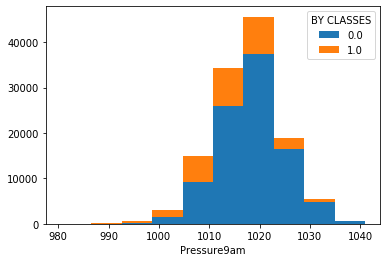

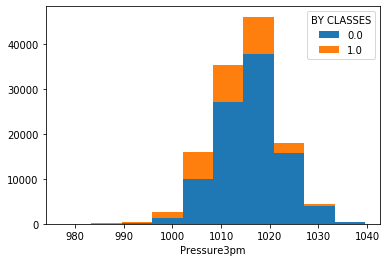

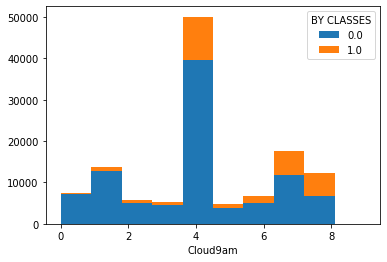

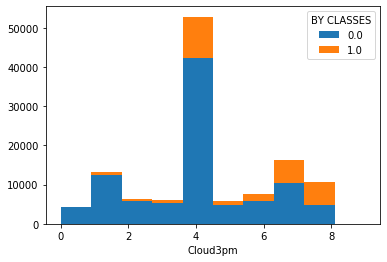

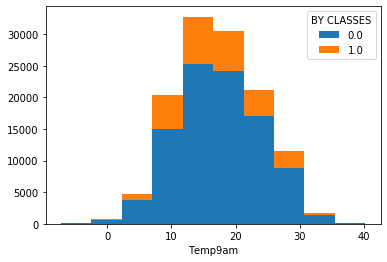

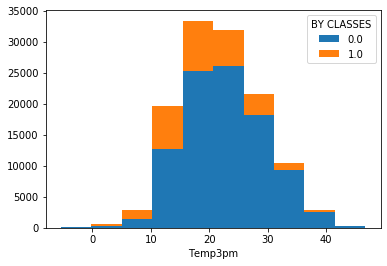

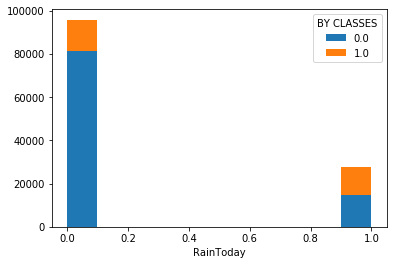

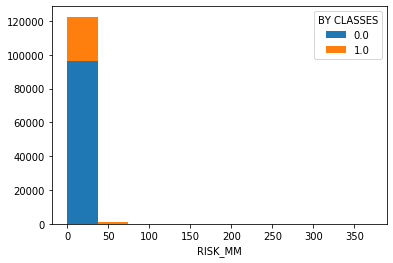

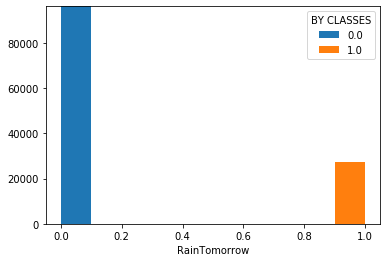

In [232]:
cols=df.columns
for colName in cols:
    plotByClasses(df, colName, df['RainTomorrow'])

In [233]:
df.shape

(123710, 23)

In [234]:
## Smote process and grid search as rain tomorrow is uneven


In [265]:
Y_train.head()

82664    0.0
23627    0.0
83929    1.0
87874    0.0
48618    0.0
Name: RainTomorrow, dtype: float64

In [235]:
print('Original dataset shape %s' % Counter(Y_train))
sm = SMOTE()

Original dataset shape Counter({0.0: 64528, 1.0: 18357})


In [266]:
def findBestRatio(df, rat):
    sm = SMOTE(ratio=rat)
    indep=df.iloc[:, :22]
    classes=df['RainTomorrow']
    
    X_train_res, Y_train_res = sm.fit_sample(indep, classes)
    X_train, X_test, Y_train, Y_test = train_test_split(X_train_res, Y_train_res, test_size=0.33, random_state=42)    
    
    clf=LogisticRegression()
    clf.fit(X_train_res, Y_train_res)
    Y_Pred=clf.predict(X_test)
    print(accuracy_score(Y_Pred, Y_test))
    
    #print conf matrix
    print('FOR Ratio:')
    print(rat)
    cnf_matrix = confusion_matrix(Y_test, Y_Pred)
    print(cnf_matrix)

In [267]:
weights=np.linspace(0.5, 1, 5)
for i in weights:
    findBestRatio(df, i)

D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9999580519317085
FOR Ratio:
0.5
[[31834     0]
 [    2 15842]]


D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9999612785812472
FOR Ratio:
0.625
[[31650     1]
 [    1 19999]]


D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9999820221487128
FOR Ratio:
0.75
[[31672     0]
 [    1 23951]]


D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.999983220631911
FOR Ratio:
0.875
[[31698     0]
 [    1 27898]]


D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9999842693094226
FOR Ratio:
1.0
[[31552     0]
 [    1 32017]]
